In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [2]:
import yfinance as yf

data = yf.download("AAPL", period="max")
data.to_csv("../data/AAPL.csv")

print(data.head())


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
1980-12-12  0.098389  0.098817  0.098389  0.098389  469033600
1980-12-15  0.093256  0.093684  0.093256  0.093684  175884800
1980-12-16  0.086412  0.086839  0.086412  0.086839  105728000
1980-12-17  0.088550  0.088978  0.088550  0.088550   86441600
1980-12-18  0.091118  0.091545  0.091118  0.091118   73449600


In [3]:


import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../data/AAPL.csv")

print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11365 entries, 0 to 11364
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   11365 non-null  object
 1   Close   11364 non-null  object
 2   High    11364 non-null  object
 3   Low     11364 non-null  object
 4   Open    11364 non-null  object
 5   Volume  11364 non-null  object
dtypes: object(6)
memory usage: 532.9+ KB
None


In [4]:
data.index = pd.to_datetime(data.index)



In [5]:
print(data['Close'].dtype)
print(data['Close'].head())



object
1970-01-01 00:00:00.000000000                   AAPL
1970-01-01 00:00:00.000000001                    NaN
1970-01-01 00:00:00.000000002    0.09838945418596268
1970-01-01 00:00:00.000000003    0.09325642883777618
1970-01-01 00:00:00.000000004    0.08641161024570465
Name: Close, dtype: object


In [6]:
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data = data.dropna()


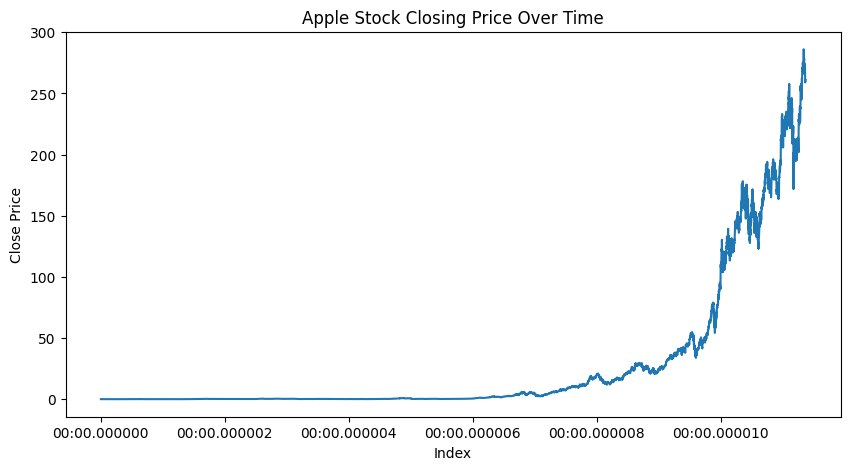

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(data['Close'])
plt.title("Apple Stock Closing Price Over Time")
plt.xlabel("Index")
plt.ylabel("Close Price")
plt.show()


In [8]:
close_prices = data[['Close']]
print(close_prices.head())


                                  Close
1970-01-01 00:00:00.000000002  0.098389
1970-01-01 00:00:00.000000003  0.093256
1970-01-01 00:00:00.000000004  0.086412
1970-01-01 00:00:00.000000005  0.088550
1970-01-01 00:00:00.000000006  0.091118


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(close_prices)

print(scaled_prices[:5])


[[0.00021228]
 [0.00019434]
 [0.00017042]
 [0.0001779 ]
 [0.00018687]]


In [10]:
X = []
y = []

window_size = 60

for i in range(window_size, len(scaled_prices)):
    X.append(scaled_prices[i - window_size:i, 0])
    y.append(scaled_prices[i, 0])

X, y = np.array(X), np.array(y)

print(X.shape, y.shape)


(11303, 60) (11303,)


In [11]:
X = X.reshape((X.shape[0], X.shape[1], 1))
print(X.shape)


(11303, 60, 1)


In [12]:
split = int(0.8 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(X_train.shape, X_test.shape)


(9042, 60, 1) (2261, 60, 1)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [14]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - loss: 1.7293e-05 - val_loss: 0.0025
Epoch 2/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 1.6371e-06 - val_loss: 0.0020
Epoch 3/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 1.5437e-06 - val_loss: 0.0028
Epoch 4/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 1.5191e-06 - val_loss: 0.0026
Epoch 5/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 1.5343e-06 - val_loss: 9.7529e-04
Epoch 6/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 1.2631e-06 - val_loss: 0.0013
Epoch 7/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 1.2578e-06 - val_loss: 0.0016
Epoch 8/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - loss: 1.1362e-06 - val_loss: 0.0024
Epoch 9/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 1.1475e-06 - val_loss: 9.7726e-04
Epoch 10/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 1.0921e-06 - val_loss: 9.9047e-04


In [17]:
predictions = model.predict(X_test)
predictions

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


array([[0.09589393],
       [0.09616982],
       [0.09641415],
       ...,
       [0.8483824 ],
       [0.84294456],
       [0.8388332 ]], shape=(2261, 1), dtype=float32)

In [18]:
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


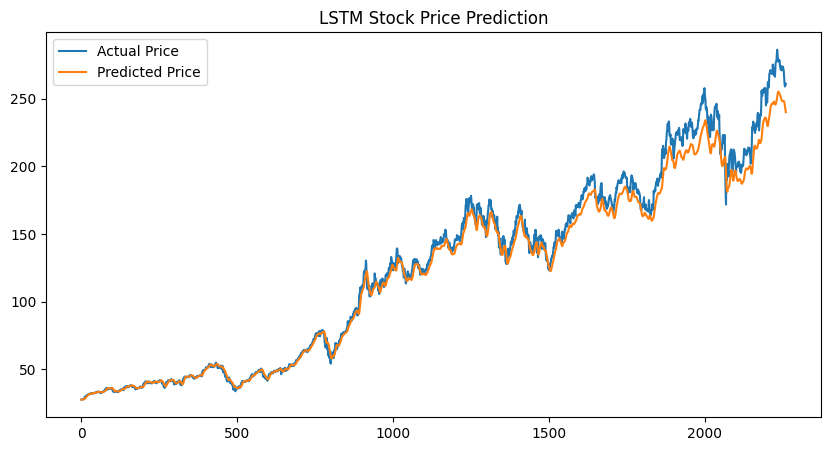

In [19]:
plt.figure(figsize=(10,5))
plt.plot(y_test_actual, label="Actual Price")
plt.plot(predictions, label="Predicted Price")
plt.legend()
plt.title("LSTM Stock Price Prediction")
plt.show()
